# IPL winner and score prediction

In [1]:
# importing libraries
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# load preprocessed data
dataset = pd.read_csv('../data/IPL.csv')
dataset

,id,inning,batting_team,bowling_team,batting_team_won%,bowling_team_won%,ball,over,venue,batsman,non_striker,season,toss_winner,toss_decision,winner,score,wickets,final_score,number_of_time_batting_team_win,number_of_time_bowling_team_win
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,51.578947,47.643979,1,0,M Chinnaswamy Stadium,player1,player2,2008,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,0,222,11,8
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,51.578947,47.643979,2,0,M Chinnaswamy Stadium,player2,player1,2008,Royal Challengers Bangalore,field,Kolkata Knight Riders,1,0,222,11,8
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,51.578947,47.643979,3,0,M Chinnaswamy Stadium,player2,player1,2008,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,0,222,11,8
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,51.578947,47.643979,4,0,M Chinnaswamy Stadium,player2,player1,2008,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,0,222,11,8
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,51.578947,47.643979,5,0,M Chinnaswamy Stadium,player2,player1,2008,Royal Challengers Bangalore,field,Kolkata Knight Riders,2,0,222,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146262,802,1,Kings XI Punjab,Kolkata Knight Riders,46.808511,51.578947,1,18,Sharjah Cricket Stadium,player3,player2,2020,Kings XI Punjab,field,Kings XI Punjab,147,2,150,7,12
146263,802,1,Kings XI Punjab,Kolkata Knight Riders,46.808511,51.578947,2,18,Sharjah Cricket Stadium,player4,player2,2020,Kings XI Punjab,field,Kings XI Punjab,147,2,150,7,12
146264,802,1,Kings XI Punjab,Kolkata Knight Riders,46.808511,51.578947,3,18,Sharjah Cricket Stadium,player4,player2,2020,Kings XI Punjab,field,Kings XI Punjab,148,2,150,7,12
146265,802,1,Kings XI Punjab,Kolkata Knight Riders,46.808511,51.578947,4,18,Sharjah Cricket Stadium,player2,player4,2020,Kings XI Punjab,field,Kings XI Punjab,149,2,150,7,12


## Data Preprocessing 

In [5]:
# unique value in ball column
dataset.ball.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
# replace value
dataset['ball'].replace({7:6,8:6,9:6},inplace=True)

In [7]:
# add new column projected score
dataset['projected_score'] = (dataset['score']/(dataset['over']*6+dataset['ball']))*120

In [8]:
# calculate the IPL season using year
season_map = {2008:1, 2009:2, 2010:3, 2011:4, 2012:5, 2013:6, 2014:7, 2015:8, 2016:9, 2017:10, 2018:11, 2019:12, 2020:13}
dataset.season = dataset.season.map(season_map)

In [9]:
# map team name
team_mapper = {'Sunrisers Hyderabad': 0,
 'Royal Challengers Bangalore': 1,
 'Mumbai Indians': 2,
 'Kolkata Knight Riders': 3,
 'Kings XI Punjab': 4,
 'Chennai Super Kings': 5,
 'Rajasthan Royals': 6,
 'Delhi Capitals': 7}

dataset['batting_team'] = dataset['batting_team'].map(team_mapper)
dataset['bowling_team'] = dataset['bowling_team'].map(team_mapper)
dataset['winner'] = dataset['winner'].map(team_mapper)
dataset['toss_winner'] = dataset['toss_winner'].map(team_mapper)

dataset = dataset[(dataset.winner==0.)|(dataset.winner==1.)|(dataset.winner==2.)|(dataset.winner==3.)|(dataset.winner==4.)|(dataset.winner==5.)|(dataset.winner==6.)|(dataset.winner==7.)]
dataset.winner = dataset.winner.astype('int')

In [10]:
# map player name
player_mapper = {'player1':0, 'player2':1, 'player3':2, 'player4':3, 'player5':4, 'player6':5, 'player7':6, 'player8':7, 'player9':8, 'player10':9, 'player11':10}
dataset['batsman'] = dataset['batsman'].map(player_mapper)
dataset['non_striker'] = dataset['non_striker'].map(player_mapper)

In [11]:
toss_mapper = {'field':0, 'bat':1}
dataset['toss_decision'] = dataset['toss_decision'].map(toss_mapper)

In [12]:
# replace value
dataset.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium, Mohali',inplace=True)
dataset.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [13]:
# top 10 stadium where more number of matches played
list(dataset.venue.value_counts().index[:10])

['Eden Gardens',
 'M Chinnaswamy Stadium',
 'Wankhede Stadium',
 'Feroz Shah Kotla',
 'MA Chidambaram Stadium, Chepauk',
 'Punjab Cricket Association Stadium, Mohali',
 'Sawai Mansingh Stadium',
 'Rajiv Gandhi International Stadium, Uppal',
 'Dubai International Cricket Stadium',
 'Sheikh Zayed Stadium']

In [14]:
venue_mapper = {'other':0,
 'Eden Gardens':1,
 'M Chinnaswamy Stadium':2,
 'Wankhede Stadium':3,
 'Feroz Shah Kotla':4,
 'MA Chidambaram Stadium, Chepauk':5,
 'Punjab Cricket Association Stadium, Mohali':6,
 'Sawai Mansingh Stadium':7,
 'Rajiv Gandhi International Stadium, Uppal':8,
 'Dubai International Cricket Stadium':9,
 'Sheikh Zayed Stadium':10,
}

venue = []
for i in dataset['venue']:
    if i not in venue_mapper.keys():
        venue.append(0)
    else:
        venue.append(venue_mapper[i])

dataset['venue'] = venue

## IPL match winner prediction 

In [15]:
# seprate inning 1 & 2 data
inning1 = dataset[dataset.inning==1]
inning2 = dataset[dataset.inning==2]

In [16]:
# calculate target score
target_score = []

for id1 in inning2.id:
      target_score.append(np.max(inning1.score[inning1.id==id1].values)+1)
inning2['target_score'] = target_score

In [17]:
# drop some not relavent data
inning2.drop(index = inning2[inning2.final_score>inning2.target_score][inning2.batting_team!=inning2.winner].index,inplace=True)

In [18]:
# change column name winner to is_batting_team_winner
inning2.rename(columns={'winner':'is_batting_team_winner'},inplace=True)

# convert to binary formate
inning2.is_batting_team_winner[inning2.final_score>=inning2.target_score]=1
inning2.is_batting_team_winner[inning2.final_score<inning2.target_score]=0
inning2

,id,inning,batting_team,bowling_team,batting_team_won%,bowling_team_won%,ball,over,venue,batsman,...,toss_winner,toss_decision,is_batting_team_winner,score,wickets,final_score,number_of_time_batting_team_win,number_of_time_bowling_team_win,projected_score,target_score
124,1,2,1,3,47.643979,51.578947,1,0,2,0,...,1,0,0,1,0,82,11,10,120.000000,223
125,1,2,1,3,47.643979,51.578947,2,0,2,1,...,1,0,0,2,0,82,11,10,120.000000,223
126,1,2,1,3,47.643979,51.578947,3,0,2,1,...,1,0,0,2,0,82,11,10,80.000000,223
127,1,2,1,3,47.643979,51.578947,4,0,2,1,...,1,0,0,3,0,82,11,10,90.000000,223
128,1,2,1,3,47.643979,51.578947,5,0,2,0,...,1,0,0,4,0,82,11,10,96.000000,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146148,802,2,3,4,51.578947,46.808511,2,19,0,9,...,4,0,0,147,8,149,14,6,152.068966,151
146149,802,2,3,4,51.578947,46.808511,3,19,0,9,...,4,0,0,148,8,149,14,6,151.794872,151
146150,802,2,3,4,51.578947,46.808511,4,19,0,8,...,4,0,0,149,8,149,14,6,151.525424,151
146151,802,2,3,4,51.578947,46.808511,5,19,0,9,...,4,0,0,149,9,149,14,6,150.252101,151


In [19]:
# drop unnecessary columns
inning2.drop(['id','inning','final_score'],axis=1,inplace=True)

In [20]:
data = inning2

In [21]:
# add new column per_ball_run_require
data['per_ball_run_require'] = (data['target_score']-data['score'])/((120-data['over']*6)-(data['ball']-1))

In [22]:
# chnage the order of columns
columns_order = ['batting_team','bowling_team','venue','over','ball','batsman','non_striker','toss_winner','toss_decision','score','wickets','target_score','projected_score','per_ball_run_require','season','number_of_time_batting_team_win','number_of_time_bowling_team_win','batting_team_won%','bowling_team_won%','is_batting_team_winner']
data = data[columns_order]
data.tail()

,batting_team,bowling_team,venue,over,ball,batsman,non_striker,toss_winner,toss_decision,score,wickets,target_score,projected_score,per_ball_run_require,season,number_of_time_batting_team_win,number_of_time_bowling_team_win,batting_team_won%,bowling_team_won%,is_batting_team_winner
146148,3,4,0,19,2,9,8,4,0,147,8,151,152.068966,0.800000,13,14,6,51.578947,46.808511,0
146149,3,4,0,19,3,9,8,4,0,148,8,151,151.794872,0.750000,13,14,6,51.578947,46.808511,0
146150,3,4,0,19,4,8,9,4,0,149,8,151,151.525424,0.666667,13,14,6,51.578947,46.808511,0
146151,3,4,0,19,5,9,8,4,0,149,9,151,150.252101,1.000000,13,14,6,51.578947,46.808511,0
146152,3,4,0,19,6,10,8,4,0,149,9,151,149.000000,2.000000,13,14,6,51.578947,46.808511,0


In [23]:
#data = data[(data.over>5)|(data.over<=15)]
#data = data[(data.over>5)]

In [24]:
X = data.drop(['is_batting_team_winner'],axis=1)
y = data['is_batting_team_winner']

In [25]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train = X_train.values
X_test = X_test.values

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=20)

cv_score = cross_val_score(rf,X,y,cv=10,scoring='accuracy')

rfmodel = rf.fit(X_train,y_train)

#print model report
print('Model Report')
print('_________________________________________________________________________')
print("\nAccuracy Score = %.4g\n"%metrics.accuracy_score(y_test,rfmodel.predict(X_test)))
print('_________________________________________________________________________')
print(cv_score)
print('__________________________________________________________________________')
print("\nCV Score : Mean = %.4g | std = %.4f\n"%(np.mean(cv_score),np.std(cv_score)))
print('__________________________________________________________________________')
print(metrics.classification_report(y_test,rfmodel.predict(X_test)))

Model Report
_________________________________________________________________________

Accuracy Score = 0.9993

_________________________________________________________________________
[0.64168165 0.64085189 0.72783847 0.67819112 0.64527728 0.60365095
 0.70806251 0.74260028 0.64799447 0.69612725]
__________________________________________________________________________

CV Score : Mean = 0.6732 | std = 0.0423

__________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7240
           1       1.00      1.00      1.00      7222

    accuracy                           1.00     14462
   macro avg       1.00      1.00      1.00     14462
weighted avg       1.00      1.00      1.00     14462



Model Report
________________________________________________________________________

Accuracy Score = 0.7735

________________________________________________________________________
[0.6787443  0.78163463 0.74305075 0.70903056 0.73433827 0.67501037
 0.76407136 0.73554633 0.65200553 0.71327801]
_________________________________________________________________________

CV Score : Mean = 0.7187 | std = 0.0390

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      7240
           1       0.77      0.79      0.78      7222

    accuracy                           0.77     14462
   macro avg       0.77      0.77      0.77     14462
weighted avg       0.77      0.77      0.77     14462



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

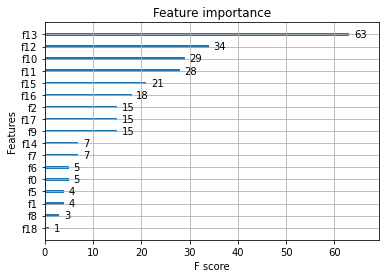

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

XGB = XGBClassifier(n_estimators=40)

cv_score = cross_val_score(XGB,X,y,cv=10,scoring='accuracy')

xgbmodel = XGB.fit(X_train,y_train)

#print model report
print('Model Report')
print('________________________________________________________________________')
print("\nAccuracy Score = %.4g\n"%metrics.accuracy_score(y_test,xgbmodel.predict(X_test)))
print('________________________________________________________________________')
print(cv_score)
print('_________________________________________________________________________')
print("\nCV Score : Mean = %.4g | std = %.4f\n"%(np.mean(cv_score),np.std(cv_score)))
print('_________________________________________________________________________')
print(metrics.classification_report(y_test,xgbmodel.predict(X_test)))

from xgboost import plot_importance
plot_importance(xgbmodel)

In [28]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

lgbm = LGBMClassifier(n_estimators=20)

cv_score = cross_val_score(lgbm,X,y,cv=10,scoring='accuracy')

lgbmmodel = lgbm.fit(X_train,y_train)

#print model report
print('Model Report')
print('________________________________________________________________')
print("\nAccuracy Score = %.4g\n"%metrics.accuracy_score(y_test,lgbmmodel.predict(X_test)))
print('_________________________________________________________________')
print(cv_score)
print('_________________________________________________________________')
print("\nCV Score : Mean = %.4g | std = %.4f\n"%(np.mean(cv_score),np.std(cv_score)))
print('__________________________________________________________________')
print(metrics.classification_report(y_test,lgbmmodel.predict(X_test)))

Model Report
________________________________________________________________

Accuracy Score = 0.8791

_________________________________________________________________
[0.66505324 0.70031807 0.71940257 0.70903056 0.67791453 0.65039414
 0.71138155 0.72392808 0.64896266 0.73056708]
_________________________________________________________________

CV Score : Mean = 0.6937 | std = 0.0291

__________________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7240
           1       0.87      0.89      0.88      7222

    accuracy                           0.88     14462
   macro avg       0.88      0.88      0.88     14462
weighted avg       0.88      0.88      0.88     14462



In [ ]:
# save xgboost model
from sklearn.externals import joblib 
filename = '../model/winner_predictor_model.pkl'
joblib.dump(xgbmodel, filename) 

## IPL Score Prediction

In [29]:
dataset = dataset[(dataset.over>5)]

In [30]:
dataset.head()

,id,inning,batting_team,bowling_team,batting_team_won%,bowling_team_won%,ball,over,venue,batsman,...,season,toss_winner,toss_decision,winner,score,wickets,final_score,number_of_time_batting_team_win,number_of_time_bowling_team_win,projected_score
38,1,1,3,1,51.578947,47.643979,1,6,2,1,...,1,1,0,3,62,1,222,11,8,201.081081
39,1,1,3,1,51.578947,47.643979,2,6,2,2,...,1,1,0,3,63,1,222,11,8,198.947368
40,1,1,3,1,51.578947,47.643979,3,6,2,1,...,1,1,0,3,64,1,222,11,8,196.923077
41,1,1,3,1,51.578947,47.643979,4,6,2,2,...,1,1,0,3,66,1,222,11,8,198.000000
42,1,1,3,1,51.578947,47.643979,5,6,2,2,...,1,1,0,3,67,1,222,11,8,196.097561


In [31]:
features = ['batting_team',
 'bowling_team',
 'venue',
 'over',
 'ball',
 'score',
 'wickets',
 'projected_score']

label = 'final_score'

X = dataset[features]
y = dataset[label]

In [32]:
# split dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.values
X_test = X_test.values

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

cv_score = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error')

lrmodel = lr.fit(X_train,y_train)

#print model report
print('Model Report')
print('_________________________________________________________________________')
print("\nmean_squared_error = %.4g\n"%(np.sqrt(metrics.mean_squared_error(y_test,lrmodel.predict(X_test)))))
print('_________________________________________________________________________')
print(cv_score)
print('__________________________________________________________________________')
print("\nCV neg_mean_squared_error : Mean = %.4g | std = %.4f\n"%(abs(np.mean(cv_score)),np.std(cv_score)))

Model Report
_________________________________________________________________________

mean_squared_error = 20.02

_________________________________________________________________________
[-21.59105546 -18.97485748 -21.29805321 -17.76756937 -19.40587137
 -19.45689778 -19.50858649 -21.09275841 -20.68958795 -19.86227732]
__________________________________________________________________________

CV neg_mean_squared_error : Mean = 19.96 | std = 1.1321



In [94]:
# save linear regression model
from sklearn.externals import joblib 
filename = '../model/score_predictor_model.pkl'
joblib.dump(lrmodel, filename) 

['model/score_predictor_model.pkl']

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()

cv_score = cross_val_score(rf,X,y,cv=10,scoring='neg_root_mean_squared_error')

rfmodel = rf.fit(X_train,y_train)

#print model report
print('Model Report')
print('_________________________________________________________________________')
print("\nmean_squared_error = %.4g\n"%(np.sqrt(metrics.mean_squared_error(y_test,rfmodel.predict(X_test)))))
print('_________________________________________________________________________')
print(cv_score)
print('__________________________________________________________________________')
print("\nCV neg_mean_squared_error : Mean = %.4g | std = %.4f\n"%(abs(np.mean(cv_score)),np.std(cv_score)))

Model Report
_________________________________________________________________________

mean_squared_error = 8.995

_________________________________________________________________________
[-25.20068003 -21.72306944 -25.19673195 -20.03207584 -23.00157503
 -21.51694975 -20.67533612 -24.13957059 -23.55188946 -23.41032829]
__________________________________________________________________________

CV neg_mean_squared_error : Mean = 22.84 | std = 1.7100



In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

rf = XGBRegressor(n_estimators=40)

cv_score = cross_val_score(rf,X,y,cv=10,scoring='neg_root_mean_squared_error')

rfmodel = rf.fit(X_train,y_train)

#print model report
print('Model Report')
print('_________________________________________________________________________')
print("\nmean_squared_error = %.4g\n"%(np.sqrt(metrics.mean_squared_error(y_test,rfmodel.predict(X_test)))))
print('_________________________________________________________________________')
print(cv_score)
print('__________________________________________________________________________')
print("\nCV neg_mean_squared_error : Mean = %.4g | std = %.4f\n"%(abs(np.mean(cv_score)),np.std(cv_score)))

[13:34:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:34:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:00] WARNI